**Author:** Kajetan Bochajczuk

*Importing of all necessary libraries and tuning some of the global settings.*

In [1]:
import numpy as np  # For numerical calculations
import matplotlib 
import matplotlib.pyplot as plt  # For plotting
import pandas as pd  # For reading external data and displaying it in tabular form
import scipy.stats  # For statistical calculations

In [2]:
matplotlib.rcParams['figure.figsize'] = [12, 10]
# matplotlib.rcParams['figure.dpi'] = 600
matplotlib.rc('font', family='Lato', size=12)

# Exercise 1
Cnsider the data from file `data_Lab5.xlsx`, which consist of observations of two variables $[Y, X]$. Suppose, $Y$ is generated by the process
$$
y_i = \alpha_0 + \alpha_1 x_i + \alpha_2 x_i^2 + e_i
$$
where $e_i$ is a white noise and is assumed to follow a normal distribution $e_i \sim \mathcal{N}(0, \sigma^2)$.

**(a)** Verify a hypothesis $H_0: \sigma^2 = 1$ versus the alternative $H_1: \sigma^2 > 1$ with Wald test. Present formula for the appropriate test statistic.

**Answer:**

We know that the Wald statistic is defined as:

$$
W = h\left(\hat\theta\right)^\intercal 
\left(
    H \left( \hat\theta \right)
    I \left( \hat\theta \right)^{-1}
    H \left( \hat\theta \right)^\intercal 
\right)^{-1}
h\left(\hat\theta\right)
\rightarrow \chi^2(M)
$$

where $\theta$ is a vactor of model parameters, $\hat\theta$ is a vector of estimated parameters, $h(\theta)$ is the restriction function, $H(\theta)$ is a vector of first derivatives of $h(\theta)$, $I(\theta)$ is the information matrix and $M$ is the number of restrictions.

In our case we have that

$$
\theta = 
\begin{bmatrix}
\alpha_0 \\
\alpha_1 \\
\alpha_2 \\
\sigma^2 \\
\end{bmatrix}
$$

and under $H_0$

$$
\sigma^2 = 1
$$

which means that

$$
h(\theta) = \sigma^2 - 1 = 
\begin{bmatrix}
0 & 0 & 0 & 1
\end{bmatrix}
\theta - 1
\text.
$$

Taking the derivatives we obtain

$$
H(\theta) =
\begin{bmatrix}
0 & 0 & 0 & 1
\end{bmatrix} =
\mathrm{const.}
$$

so 

$$
H(\theta) = H(\theta_0) = H(\hat\theta) = 
\begin{bmatrix}
0 & 0 & 0 & 1
\end{bmatrix}
\text.
$$

For linear model the inverse of the information matrix is of a following form

$$
I\left( \hat\theta \right)^{-1} =
\begin{bmatrix}
\left( X^\intercal X \right)^{-1} \hat\sigma^2 & 0 \\
0 & 2 \hat\sigma^4 / N
\end{bmatrix}
\text.
$$

Then we can compute

$$
H(\theta_0) I(\theta_0)^{-1} H(\theta_0)^\intercal = 
\begin{bmatrix}
0 & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
\left( X^\intercal X \right)^{-1} \hat\sigma^2 & 0 \\
0 & 2 \hat\sigma^4 / N
\end{bmatrix}
\begin{bmatrix}
0 \\ 
0 \\
0 \\
1
\end{bmatrix} =
\frac{2 \hat\sigma^4}{N}
\text.
$$

Using this result and the fact, that $h\left(\hat\theta\right) = \hat\sigma^2 - 1$, we get

$$
W = (\hat\sigma^2 - 1) \left( \frac{2 \hat\sigma^4}{N} \right)^{-1} (\hat\sigma^2 - 1) = \frac{N(\hat\sigma^2 - 1)^2}{2\hat\sigma^4}
$$

which asymptotical distribution should be $\chi^2(1)$.

To calculate the Wald statistic $W$ statistic, we simply need to find the estimate $\hat\sigma^2$. 

Let us define the problem in a matrix  form, i.e.

$$
\alpha = 
\begin{bmatrix}
\alpha_0 \\
\alpha_1 \\
\alpha_2 \\
\end{bmatrix}
$$

$$
X = 
\begin{bmatrix}
1 & x_1 & x_1^2 \\
1 & x_2 & x_2^2 \\
\vdots & \vdots & \vdots \\
1 & x_N & x_N^2 \\
\end{bmatrix}
$$

$$
e = 
\begin{bmatrix}
e_1 \\
e_2 \\
\vdots \\
e_N \\
\end{bmatrix}
$$

and then we can write

$$
Y = X\alpha + e
$$

As this is a classic linear model, we have that

$$
\hat\alpha = (X^\intercal X)^{-1} X^\intercal Y
$$

## Implementation

First we need to load the data and construct the $X$ matrix.

In [3]:
data = pd.read_excel('data_Lab5.xlsx', header=None)
Y = data[0].values
X = data[1].values
X = np.array([
    np.ones_like(X),
    X,
    X ** 2
]).T

Then we can calculate the $\hat\alpha$ estimator

In [4]:
alpha_hat = np.linalg.inv(X.T @ X) @ X.T @ Y

Afterwards we will calculate the error estimate $\hat e = Y - X\hat\alpha$

In [5]:
e_hat = Y - X @ alpha_hat

Assuming that $e_t \sim \mathcal{N}(0, \sigma^2)$, we can calculate the sample variance of error term

$$
\hat\sigma^2 = \frac{1}{N-1}\sum_{t=1}^N e_t^2
$$

In [6]:
sigma2_hat = sum(e_hat ** 2) / (len(e_hat) - 1)

And now the only thing left to do is to calculate the Wald statistic $W$

In [7]:
W = len(X) * (sigma2_hat - 1) ** 2 / (2 * sigma2_hat ** 2)

As we have mentioned already $W$ statistic is from the $\chi^2(1)$ disribution. To check if the we have statistical evidence to reject the $H_0$ hypothesis, we will first calculate the p-value

$$
\text{p-value} = 1 - F_{\chi^2(1)}(W)
$$

In [8]:
p_value = 1 - scipy.stats.chi2.cdf(W, df=1)
p_value

0.5124041399793847

As we can see the p-values is bigger than the rule-of-thumb $0.05$, so we do not have a reason to reject the $H_0$ hypothesis.

**(b)**
Suppose, you want to test, if the polynomial $\alpha_0 + \alpha_1 x_i + \alpha_2 x_i^2$ has exactly one root. Derive and present the test for Wald statistic. What is its asymptotic distribution? Present the result.

**Solution:**
The quadratic polynomial has exactly one root if

$$
\Delta = \alpha_1^2 - 4 \alpha_0 \alpha_2 = 0
\text.
$$

Thus our null and alternative hypotheses look as follows

$$
H_0: \Delta = 0
\text,
$$
$$
H_1: \Delta \ne 0
\text.
$$

So now we have

$$
h(\theta) = \alpha_1^2 - 4 \alpha_0 \alpha_2
$$

and

$$
H(\theta) = 
\begin{bmatrix}
-4\alpha_2 & 2\alpha_1 & -4\alpha_0 & 0
\end{bmatrix}
\text.
$$

For vector of parameter estimates $\hat\theta$ we have

$$
h(\hat\theta) = \hat\alpha_1^2 - 4 \hat\alpha_0 \hat\alpha_2
$$

$$
H(\hat\theta) = 
\begin{bmatrix}
-4\hat\alpha_2 & 2\hat\alpha_1 & -4\hat\alpha_0 & 0
\end{bmatrix}
\text.
$$

And then the Wald statistic is as follows

$$
W = \left( \alpha_1^2 - 4 \alpha_0 \alpha_2 \right)^2
\left(
    \begin{bmatrix}
    -4\hat\alpha_2 & 2\hat\alpha_1 & -4\hat\alpha_0 & 0
    \end{bmatrix}
    \begin{bmatrix}
    \left( X^\intercal X \right)^{-1} \hat\sigma^2 & 0 \\
    0 & 2 \hat\sigma^4 / N
    \end{bmatrix}
    \begin{bmatrix}
    -4\hat\alpha_2 \\
    2\hat\alpha_1 \\
    -4\hat\alpha_0 \\
    0
    \end{bmatrix}
\right)^{-1}
$$



## Implementation

In [9]:
H = np.array([
    -4 * alpha_hat[2],
    2 * alpha_hat[1],
    -4 * alpha_hat[0],
    0
])
_ = np.linalg.inv(X.T @ X)  # Assignment to variable for less calculations
I_inv = np.vstack([
    np.hstack([_ * sigma2_hat, np.zeros((3, 1))]),
    np.hstack([np.zeros((1, 3)), np.atleast_2d(2 * sigma2_hat ** 2 / len(X))])
])

In [10]:
W = (alpha_hat[1] ** 2 - 4 * alpha_hat[0] * alpha_hat[2]) ** 2 * \
    (H @ I_inv @ H.T) ** (-1)
W

1.421068039600996

As previosly we will calculate the p-value, to check if we have any evidence to reject the null hypothesis

In [11]:
p_value = 1 - scipy.stats.chi2.cdf(W, df=1)
p_value

0.233227688987813

As previously we don't have statistical evidence to reject the hypothesis.

# Exercise 2
Suppose, you want to verify if in the model $y_t = \alpha x_t + e_t$ the parameter $\alpha$ is different from zero. The hypothesis is typically tested with a t-Student test. The aim of this exercise is to check, how important is the stationarity assumptions of residuals. In order to verify the test performance, propose and conduct a small Monte-Carlo experiment.

- Define the numberf of MC iterations ($N$) and the sample size (choose one sample size, for example $T=200$).
- Choose values of the parameter $\alpha$, for which the frequency of rejections will be computed (both under the null and the alternative).
- Generate $N$ different realizations of the stationary exogenous variable $x_t$ (it may come from a normal distribution $x_t \sim \mathcal{N}(\mu_x, \sigma_x^2)$).
- Describe the test properties (size and power), for stationary residuals. In order to do so, for each MC iteration, generate a white noise $e_t \sim \mathcal{N}(0, \sigma^2)$. Then, conditional on the parameter $\alpha$, generate $y_t$ and compute the $t$ statistic. Compare it with the critical value from the t-Student distribution and check if the null is rejected or not.
- Now, repeat the procedure from previous point for residuals, which come from the random walk.
- Compute the frequency of null rejections for different scenarios and parameter values.
- What are the empirical size and powers of the test, when the residuals are white noise/random walk. Comment on the results.

## Implementation

In [38]:
N = 1000  # Number of Monte Carlo iterations.
T = 200  # Sample size
alphas = np.linspace(-.5, .5)  # Alpha's range
mu = 0  # Normal distribution mean
sigma = 1  # Normal distribution standard error

power_stationary = []
power_random_walk = []
for alpha in alphas:
    n_rejections_stationary = 0
    n_rejections_random_walk = 0
    for i in range(N):
        # Generate the x variable
        x = np.random.normal(loc=mu, scale=2 * sigma, size=T)
        
        # Generate the residuals
        e_stationary = np.random.normal(loc=mu, scale=sigma, size=T)
        e_random_walk = np.cumsum(np.random.choice([-1, 1], size=T))
        
        # Generate the response variables
        y_stationary = alpha * x + e_stationary
        y_random_walk = alpha * x + e_random_walk
        
        # Calculate the p-values
        *_, p_value_stationary, _ = scipy.stats.linregress(x, y_stationary)
        *_, p_value_random_walk, _ = scipy.stats.linregress(x, y_random_walk)
        
        # Compare the p-values with 0.05
        if p_value_stationary < 0.05:
            n_rejections_stationary += 1
        if p_value_random_walk < 0.05:
            n_rejections_random_walk += 1
            
    # Append the average results
    power_stationary.append(n_rejections_stationary / N)
    power_random_walk.append(n_rejections_random_walk / N)

Now we will plot the results

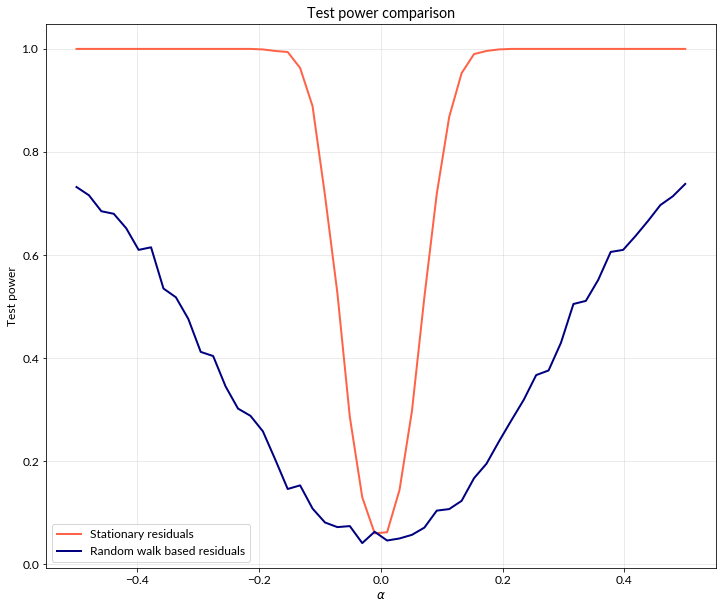

In [49]:
plt.plot(alphas, power_stationary, color='tomato', linewidth=2, label='Stationary residuals')
plt.plot(alphas, power_random_walk, color='navy', linewidth=2, label='Random walk based residuals')
plt.grid(alpha=0.3)
plt.xlabel(r'$\alpha$')
plt.ylabel('Test power')
plt.title('Test power comparison')
plt.legend()
plt.show()

As we could have expected for stationary residuals the test has good properties. Close to the true value of $\alpha$ the test power is close to the significance level $0.05$. If the residuals are based on the random walk on the other hand, test displays much worse properties.